# Correlação

In [3]:
import numpy as np
import pandas as pd

In [4]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [5]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [6]:
colegiox.shape

(41, 28)

In [7]:
# criando uma lista com notas 
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [8]:
# criando coluna chamada nota final que é a média de todas as notas
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))

C:\Users\Luiza\AppData\Local\Temp\ipykernel_18528\3627531094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))


O parâmetro axis em pandas é usado para especificar ao longo de qual eixo a função deve operar. Em um DataFrame, o eixo 0 se refere às linhas (eixo das linhas), enquanto o eixo 1 se refere às colunas (eixo das colunas).

In [9]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,nota_final
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim,385.58
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não,548.42
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não,399.60
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim,446.16
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim,433.62


In [10]:
# pegando somente as notas e a média delas
notas_colegiox = colegiox[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]

In [11]:
notas_colegiox.head(5)

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


### Gráfico correlação

In [12]:
import seaborn as sns

C:\Users\Luiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


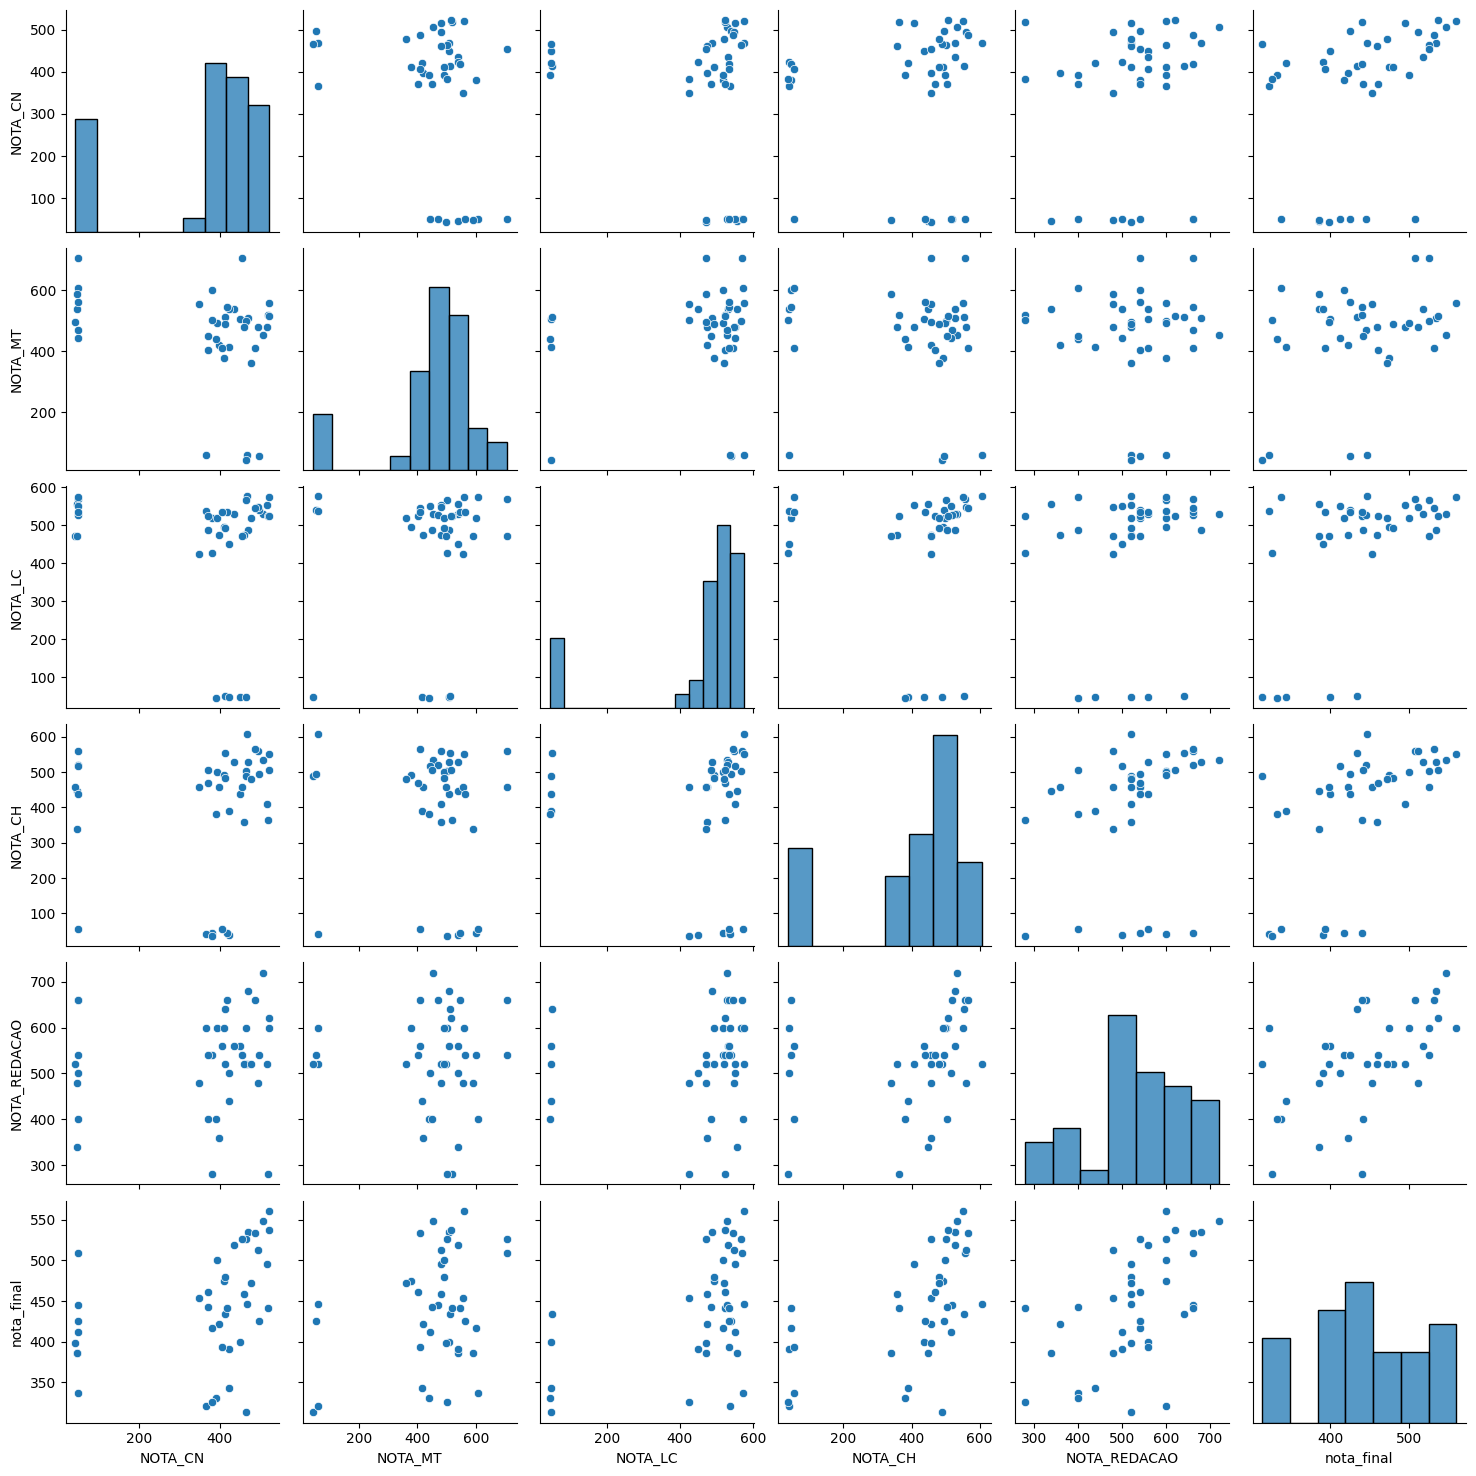

In [13]:
sns.pairplot(notas_colegiox) # os gráficos de barras são onde não tem correlações e uma única variável

In [14]:
import matplotlib.pyplot as plt

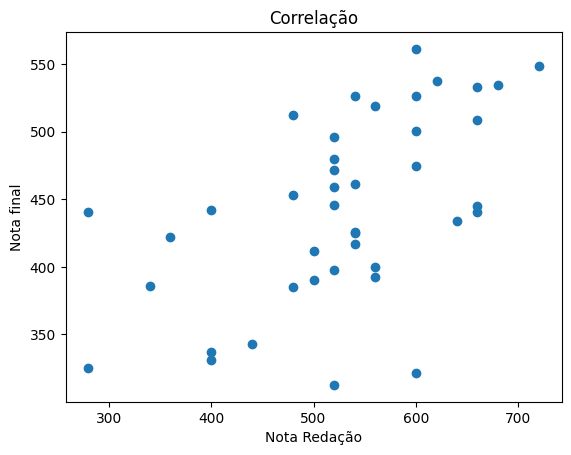

In [15]:
plt.scatter(notas_colegiox.NOTA_REDACAO,notas_colegiox.nota_final) #(x,y)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota final')
plt.grid(False) 
plt.show()

In [16]:
correlacoes = notas_colegiox.corr(method='spearman').round(2) # utilizando método de spearman
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.00,-0.21,0.12,0.32,0.24,0.55
NOTA_MT,-0.21,1.00,0.02,-0.18,0.02,0.13
NOTA_LC,0.12,0.02,1.00,0.34,0.25,0.35
NOTA_CH,0.32,-0.18,0.34,1.00,0.44,0.67
NOTA_REDACAO,0.24,0.02,0.25,0.44,1.00,0.56
nota_final,0.55,0.13,0.35,0.67,0.56,1.00


In [17]:
correlacoes = notas_colegiox.corr(method='pearson').round(2) # utilizando método de pearson p medir a correlação das grandezas
correlacoes 

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.00,-0.30,-0.16,0.08,0.13,0.35
NOTA_MT,-0.30,1.00,0.14,-0.08,-0.02,0.32
NOTA_LC,-0.16,0.14,1.00,-0.04,0.13,0.47
NOTA_CH,0.08,-0.08,-0.04,1.00,0.26,0.58
NOTA_REDACAO,0.13,-0.02,0.13,0.26,1.00,0.55
nota_final,0.35,0.32,0.47,0.58,0.55,1.00


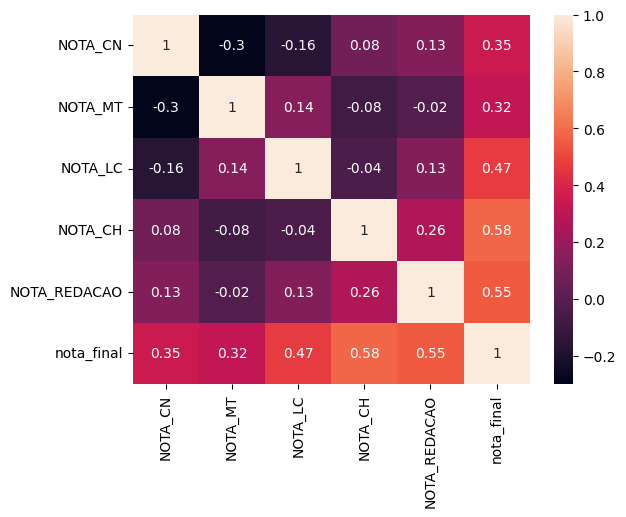

In [18]:
plt.figure()
sns.heatmap(correlacoes, annot=True);  # mapa de calor com identificadores

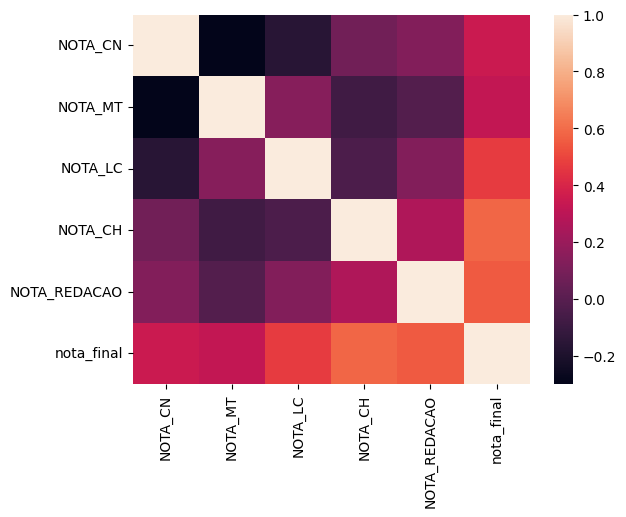

In [19]:
plt.figure()
sns.heatmap(correlacoes, annot=False); # sem identificadores

### Análise da Normalidade

Pelo teste do shapiro-wilk para analisar qual correlação é a mais adequada

- Ho = distribuição normal : p > 0,05
- Ha = distriuição diferente de normal : p <= 0,05

In [20]:
import scipy.stats as stats

In [21]:
# nota de redação 
stats.shapiro(notas_colegiox.NOTA_REDACAO) # normal

ShapiroResult(statistic=0.9529756903648376, pvalue=0.08905091136693954)

In [22]:
# nota final
stats.shapiro(notas_colegiox.nota_final) # diferente de normal, utilizamos pearson

ShapiroResult(statistic=0.9638933539390564, pvalue=0.21481332182884216)

In [23]:
# nota de Matemática
stats.shapiro(notas_colegiox.NOTA_MT) # diferente de normal, e-... significa base 10

ShapiroResult(statistic=0.798567533493042, pvalue=5.104646334075369e-06)

In [24]:
# nota de Ciências da Natureza
stats.shapiro(notas_colegiox.NOTA_CN) # utilizamos spearman pq não é normal e tem mais de 30 amostras (daí não podemos utilizar kendall)

ShapiroResult(statistic=0.7349029779434204, pvalue=2.995314787312964e-07)

In [25]:
# nota de Linguagem e Códigos
stats.shapiro(notas_colegiox.NOTA_LC)

ShapiroResult(statistic=0.5986173152923584, pvalue=2.23514540209635e-09)

In [26]:
# nota de Ciências Humanas
stats.shapiro(notas_colegiox.NOTA_CH)

ShapiroResult(statistic=0.7509260773658752, pvalue=5.865736625310092e-07)

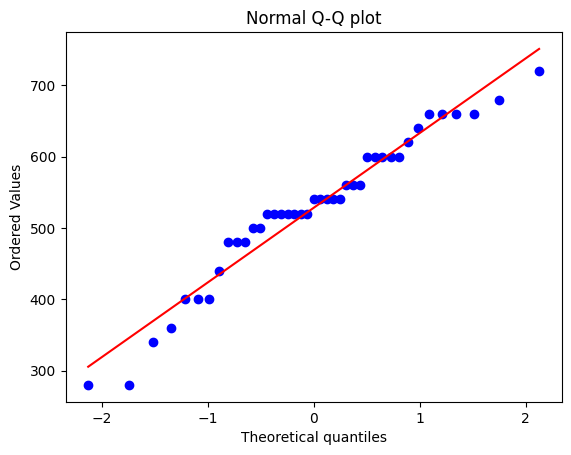

In [27]:
stats.probplot(notas_colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show() # analisando agora visualmente que a distribuição obedece a normal

In [28]:
correlacoes = notas_colegiox.corr(method='spearman').round(2)
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.00,-0.21,0.12,0.32,0.24,0.55
NOTA_MT,-0.21,1.00,0.02,-0.18,0.02,0.13
NOTA_LC,0.12,0.02,1.00,0.34,0.25,0.35
NOTA_CH,0.32,-0.18,0.34,1.00,0.44,0.67
NOTA_REDACAO,0.24,0.02,0.25,0.44,1.00,0.56
nota_final,0.55,0.13,0.35,0.67,0.56,1.00


### Análise dos Outliers


In [29]:
import plotly.express as px

In [30]:
grafico = px.box(notas_colegiox, y='NOTA_REDACAO')
grafico.show()

In [31]:
grafico = px.box(notas_colegiox, y="NOTA_MT")
grafico.show()

In [32]:
grafico = px.box(notas_colegiox, y="NOTA_CN")
grafico.show()

In [33]:
grafico = px.box(notas_colegiox, y="NOTA_CH")
grafico.show()

In [34]:
grafico = px.box(notas_colegiox, y="NOTA_LC")
grafico.show()

In [35]:
grafico = px.box(notas_colegiox, y="nota_final")
grafico.show()

# Regressão

## Regressão Linear com Statsmodels

In [36]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_colegiox).fit() # ols é a regressão
print(regressao.summary()) # ~ fazendo relação entre 2 variáveis. eixo y ~ eixo x.
# summary mostra os resultados da regressão.
# R-squared = r quadrado
# coeficiente de determinação = Adj. R-squared, deu baixo então tem uma baixa qualidade
# Intercept = coef linear
# NOTA_REDACAO = coef angular

In [41]:
coefs = pd.DataFrame(regressao.params) # imprimindo os coeficientes
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749


Equação / Modelo Matemático:

Nota Final = 251,678855 + 0,362749 * Nota Redação

In [42]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [40]:
regressao.predict() # previsão de nota final para cada um dos alunos do colégio x
#  251,678855 + 0,362749 * 340.0 = 375.01357169

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [43]:
residuos = regressao.resid # distância entre cada um dos dados entre a reta ajustada
residuos

37         10.566428
44         35.561745
52        -55.218388
65          5.851578
79        -50.218321
84         39.811445
85         36.531712
91         63.921612
17070      57.251645
17072    -127.628422
17078     -22.083405
17110     -42.653438
108151     17.606695
108155     87.571378
108180     55.451578
138498    -68.448488
182510     86.501545
182519     18.771578
182528     27.621545
182546    -30.503405
182581    -45.833305
182613    -50.333305
182614     78.516595
182615     42.066695
182637    -42.508422
182683     31.031645
182697   -148.128355
230978    -59.558522
287389     13.896595
287716    -40.338455
347945    -65.858522
365950      5.551645
365951    -61.998388
365980    -21.493438
365984     39.151578
365986    -28.028622
378313     91.931645
445647    -22.163405
445741     31.491578
445790     45.381478
445809     60.956662
dtype: float64

C:\Users\Luiza\AppData\Local\Temp\ipykernel_18528\2473267356.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



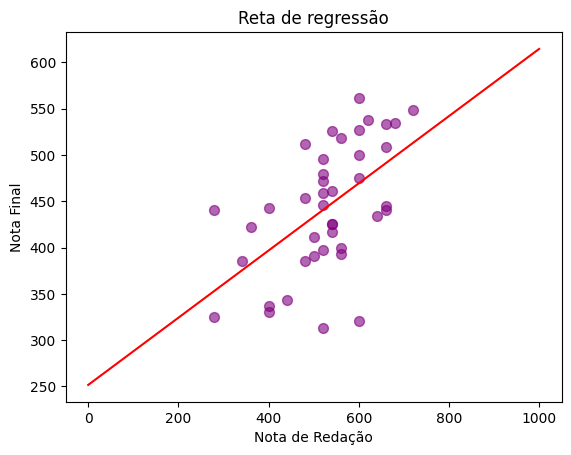

In [54]:
plt.scatter(y=notas_colegiox.nota_final, x=notas_colegiox.NOTA_REDACAO, color='purple', s=50, alpha=0.6) # gráfico de dispersão, s=tamanho dos marcadores
# X_plot = np.linspace(min(notas_colegiox.NOTA_REDACAO), max(notas_colegiox.NOTA_REDACAO), len(notas_colegiox.NOTA_REDACAO)) ond
X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

### Teste de Normalidade dos resíduos

In [55]:
# Residuos da nota redação
stats.shapiro(residuos) # maior que 0,05 para p_valor. é dist. normal

ShapiroResult(statistic=0.9587119221687317, pvalue=0.1417592167854309)

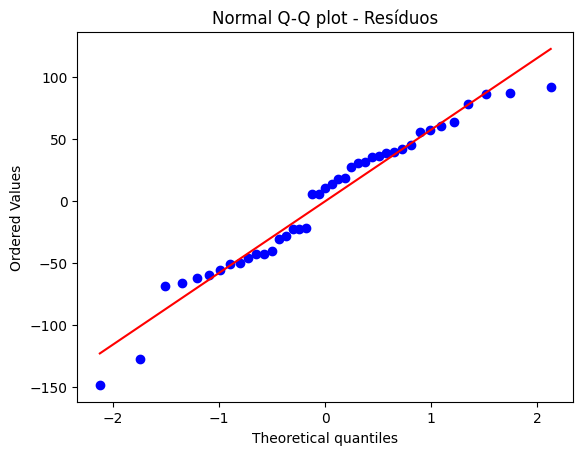

In [56]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

A análise da homocedasticidade dos resíduos em um modelo de regressão visa verificar se a dispersão dos erros é constante ao longo dos valores previstos pela variável independente. Se a variância dos resíduos não for constante, isso pode indicar problemas no modelo, como subestimação ou superestimação da variabilidade. Um gráfico de dispersão dos resíduos em relação aos valores previstos é comumente utilizado para essa análise.

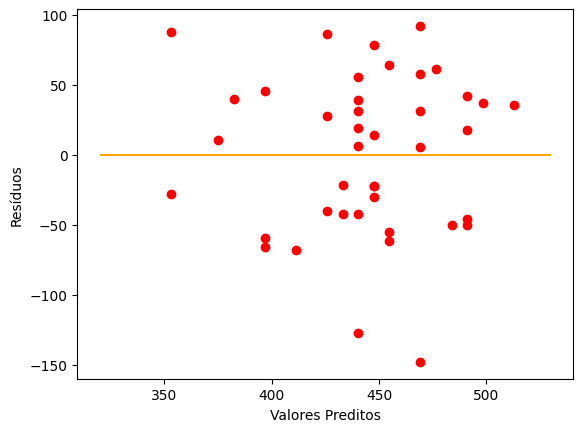

In [57]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=320, xmax=530, color='orange') # linha horizontal laranja
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show() # tem que ser um retângulo para confirmar a homocedasticidade

## Regressão Linear com Sklearn

In [58]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [59]:
# colunas da tabela por índice 0, 1, 2, 3, e 5
# localizando as colunas
x = notas_colegiox.iloc[:, 4].values # NOTA_REDACAO
y = notas_colegiox.iloc[:, 5].values # nota_final 

In [60]:
# verificando correlação
correlacao2 = np.corrcoef(x,y)
correlacao2 # diagonal é correlação dela com ela mesma, daí é perfeita (1)

array([[1.        , 0.55122032],
       [0.55122032, 1.        ]])

In [61]:
x = x.reshape(-1,1) # transformando variável (x) em matriz

In [62]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x,y)

LinearRegression()

In [63]:
regressao2.intercept_ # linear

251.6788552750226

In [64]:
regressao2.coef_ # angular

array([0.36274917])

In [65]:
regressao2.score(x,y) # coeficiente de determinação
# ficou com um valor baixo!

0.30384384379611706

In [67]:
# fazendo as previões a partir do modelo matemático
previsoes = regressao2.predict(x)
previsoes

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [68]:
previsao = regressao2.predict([[800]]) # consegue prever a previsão de um valor/nota_redacao específico
previsao # se a nota de redação for 800, qual a previsão da nota final?

array([541.87818801])